# Linear Regression with Smoothing


In [27]:
# import necessary library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
import pandas as pd
import sys
sys.path.append('../')
from Constants import Constants

In [37]:
# path to image folder
justSaturated_image_dir = os.path.join(Constants.PATH_WLI_TESTSET, "JustSaturated")

# get one sample image
img_test = cv2.imread(os.path.join(justSaturated_image_dir, 'JustSaturated1.bmp'))

# convert to normal colorspace
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

# define ROI
x_start,x_end,y_start,y_end = 600,1270,60,300 # 670x240

# crop image
img_test = img_test[y_start:y_end,x_start:x_end]




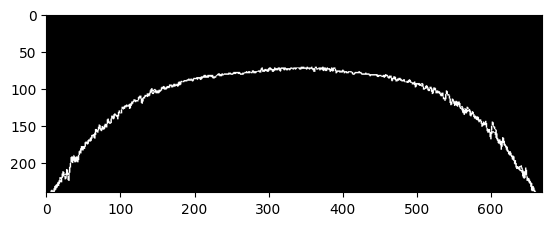

In [40]:
# isolate the blue pixels
lower_blue = np.array([0,0,200])
upper_blue = np.array([100,100,255])
mask = cv2.inRange(img_test, lower_blue, upper_blue)

# display the mask
plt.imshow(mask, cmap='gray')
plt.show()


In [48]:
# extract pixel coordinates of the blue pixels
y,x = np.where(mask==255)
y = max(y) - y

# export to csv
df = pd.DataFrame({'x':x, 'y':y})

# sort based on x 
df = df.sort_values(by=['x'])

#df.to_csv('C:\\M15\\LV5600_PoC\\LV5600 Automation\\processing\\deprecated\\export.csv', index=False)


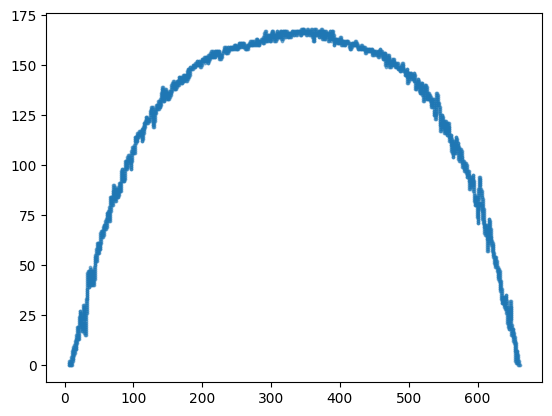

In [50]:
# display the image
plt.scatter(x,y,s=3,alpha=0.5)
plt.show()


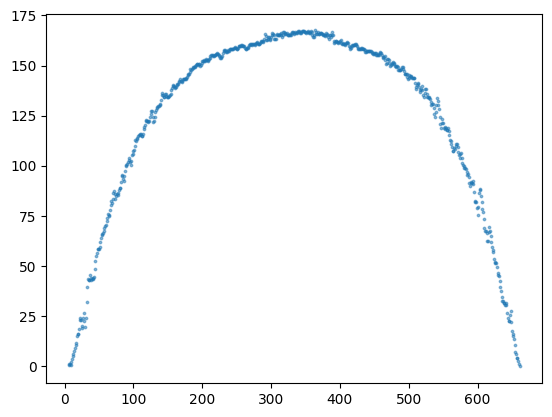

In [51]:
# for the same x, average the y
df = df.groupby('x').mean().reset_index()

# display the image
plt.scatter(df['x'],df['y'],s=3,alpha=0.5)
plt.show()


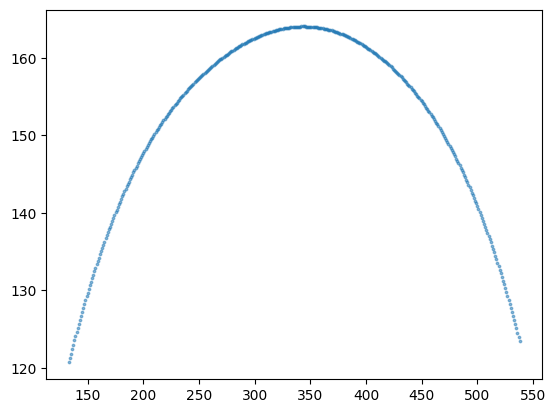

In [56]:
# make every point the avaerage of the 5 points around it
df['y'] = df['y'].rolling(20,center=True).mean()

# display the image
plt.scatter(df['x'],df['y'],s=3,alpha=0.5)
plt.show()

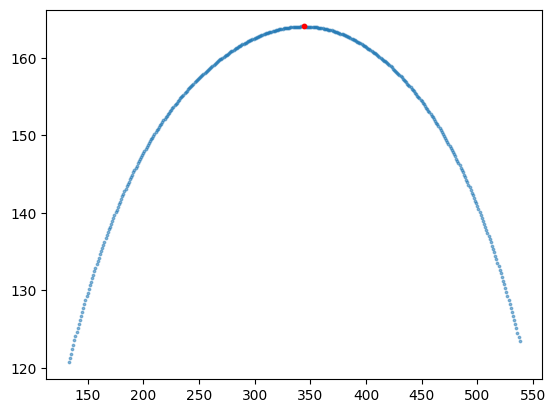

In [59]:
# extract peak value
peak = df['y'].max()

# extract peak location
peak_location = df['x'][df['y'].idxmax()]


# display peak position on image
plt.scatter(df['x'],df['y'],s=3,alpha=0.5)
plt.scatter(peak_location,peak,s=10,alpha=1,c='r')
plt.show()



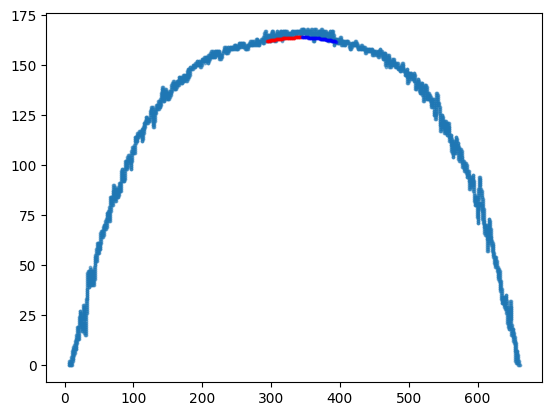

In [64]:
# find coordinates to the left of the peak, compare x value, select 100 of them
left_coordinates = df[df['x']<peak_location].sort_values(by=['x'],ascending=False).head(50)

# find coordinates to the right of the peak, compare x value, select 100 of them
right_coordinates = df[df['x']>peak_location].sort_values(by=['x'],ascending=True).head(50)

# plot the left and right coordinates on the original image
plt.scatter(f['x'],df['y'],s=3,alpha=0.5)
plt.scatter(left_coordinates['x'],left_coordinates['y'],s=3,alpha=0.5,color='r')
plt.scatter(right_coordinates['x'],right_coordinates['y'],s=3,alpha=0.5,color='b')
plt.show()
